In [1]:
import osimport tensorflow as tfprint(tf.__version__)

In [2]:
import pandas as pd
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.drop(['customerID'],axis=1,inplace=True)

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df_new=df[df.TotalCharges!=' ']

In [6]:
df_new.shape

(7032, 20)

In [7]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)

C:\Users\Jignesh\anaconda3\envs\jenil\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
one=df_new[df_new.Churn=='Yes'].tenure
sec=df_new[df_new.Churn=='No'].tenure

Text(0, 0.5, 'Frequency')

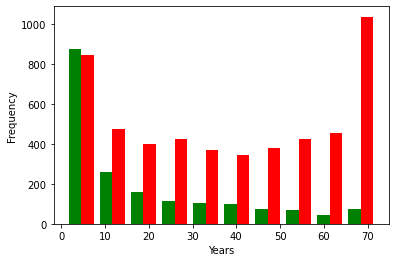

In [11]:
import matplotlib.pyplot as plt
plt.hist([one,sec],color=['green','red'])
plt.xlabel('Years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

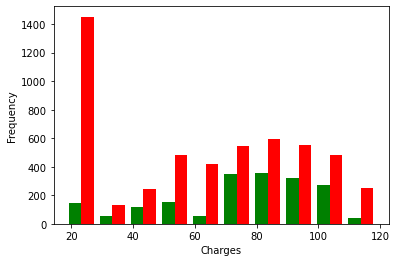

In [12]:
one=df_new[df_new.Churn=='Yes'].MonthlyCharges
sec=df_new[df_new.Churn=='No'].MonthlyCharges
import matplotlib.pyplot as plt
plt.hist([one,sec],color=['green','red'])
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [13]:
for col in df_new:
    if df_new[col].dtypes=='object':
        print(f'{col}:{df_new[col].unique()}'+'\n')

gender:['Female' 'Male']

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

PhoneService:['No' 'Yes']

MultipleLines:['No phone service' 'No' 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes' 'No internet service']

OnlineBackup:['Yes' 'No' 'No internet service']

DeviceProtection:['No' 'Yes' 'No internet service']

TechSupport:['No' 'Yes' 'No internet service']

StreamingTV:['No' 'Yes' 'No internet service']

StreamingMovies:['No' 'Yes' 'No internet service']

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:['No' 'Yes']



In [14]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

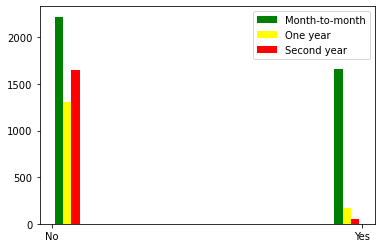

In [15]:
one=df[df.Contract=='Month-to-month'].Churn
one=one.to_numpy()
sec=df[df.Contract=='One year'].Churn
the=df[df.Contract=='Two year'].Churn
plt.hist([one,sec,the],color=['green','yellow','red'],label=['Month-to-month','One year','Second year'])
plt.legend()

In [16]:
# all_cols=[]
# for i in df_new:
#     all_cols.append(i)
#     features=[]
#     Flag=False
#     for feature in df_new[i].unique():
#             features.append(feature)
# #     print(features)
#     if len(features)==2 and 'Yes' in features:
#         Flag=True
#     else:
#         print('none')
#     print('\n')
#     if flag==True:
#         df_new[i].replace({'Yes': 1,'No': 0},inplace=True)

In [17]:
df_new['MultipleLines'].replace('No phone service','No',inplace=True)

C:\Users\Jignesh\anaconda3\envs\jenil\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [18]:
df_new['MultipleLines'].replace('No',0,inplace=True)

In [19]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,0,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
for col in df_new:
    if df_new[col].dtypes=='object':
        print(f'{col}:{df_new[col].unique()}'+'\n')

gender:['Female' 'Male']

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

PhoneService:['No' 'Yes']

MultipleLines:[0 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes' 'No internet service']

OnlineBackup:['Yes' 'No' 'No internet service']

DeviceProtection:['No' 'Yes' 'No internet service']

TechSupport:['No' 'Yes' 'No internet service']

StreamingTV:['No' 'Yes' 'No internet service']

StreamingMovies:['No' 'Yes' 'No internet service']

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:['No' 'Yes']



In [21]:
df_new['OnlineSecurity'].replace('No internet service',0,inplace=True)
df_new['OnlineBackup'].replace('No internet service',0,inplace=True)
df_new['DeviceProtection'].replace('No internet service',0,inplace=True)
df_new['TechSupport'].replace('No internet service',0,inplace=True)
df_new['StreamingTV'].replace('No internet service',0,inplace=True)
df_new['StreamingMovies'].replace('No internet service',0,inplace=True)

C:\Users\Jignesh\anaconda3\envs\jenil\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [22]:
for col in df_new:
    if df_new[col].dtypes=='object':
        print(f'{col}:{df_new[col].unique()}'+'\n')

gender:['Female' 'Male']

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

PhoneService:['No' 'Yes']

MultipleLines:[0 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes' 0]

OnlineBackup:['Yes' 'No' 0]

DeviceProtection:['No' 'Yes' 0]

TechSupport:['No' 'Yes' 0]

StreamingTV:['No' 'Yes' 0]

StreamingMovies:['No' 'Yes' 0]

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:['No' 'Yes']



In [23]:
df_new['gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [24]:

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df_new[col].replace({'Yes': 1,'No': 0},inplace=True)

In [25]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [26]:
for col in df_new:
    if df_new[col].dtypes=='object':
        print(f'{col}:{df_new[col].unique()}'+'\n')

InternetService:['DSL' 'Fiber optic' 'No']

Contract:['Month-to-month' 'One year' 'Two year']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



In [27]:
df_final=pd.get_dummies(data=df_new,columns=['InternetService','Contract','PaymentMethod'])

In [28]:
df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [29]:
for col in df_final:
    if df_final[col].dtypes=='object':
        print(f'{col}:{df_final[col].unique()}'+'\n')

In [30]:
df_final.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3327,1,0,1,0,66,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
1130,1,0,1,1,26,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5722,0,1,1,0,27,1,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3973,0,0,1,1,43,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [31]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
df_final[cols_to_scale]=scalar.fit_transform(df_final[cols_to_scale])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_final.drop(['Churn'],axis=1),df_final.Churn)

In [33]:
import tensorflow as tf
from tensorflow import keras


In [34]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Train on 5274 samples
Epoch 1/100
5274/5274 [==============================] - 5s 965us/sample - loss: 0.4981 - accuracy: 0.7480
Epoch 2/100
5274/5274 [==============================] - 1s 215us/sample - loss: 0.4361 - accuracy: 0.7918
Epoch 3/100
5274/5274 [==============================] - 1s 192us/sample - loss: 0.4275 - accuracy: 0.7931
Epoch 4/100
5274/5274 [==============================] - 1s 261us/sample - loss: 0.4232 - accuracy: 0.7996
Epoch 5/100
5274/5274 [==============================] - 1s 180us/sample - loss: 0.4199 - accuracy: 0.8003
Epoch 6/100
5274/5274 [==============================] - 2s 317us/sample - loss: 0.4180 - accuracy: 0.8036
Epoch 7/100
5274/5274 [==============================] - 1s 185us/sample - loss: 0.4160 - accuracy: 0.8036 - loss: 0.4155 - ac
Epoch 8/100
5274/5274 [==============================] - 1s 156us/sample - loss: 0.4141 - accuracy: 0.8060
Epoch 9/100
5274/5274 [==============================] - 1s 130us/sample - loss: 0.4131 - accuracy: 0.

5274/5274 [==============================] - 1s 155us/sample - loss: 0.3590 - accuracy: 0.8257
Epoch 76/100
5274/5274 [==============================] - 1s 153us/sample - loss: 0.3600 - accuracy: 0.8227
Epoch 77/100
5274/5274 [==============================] - 1s 116us/sample - loss: 0.3596 - accuracy: 0.8259
Epoch 78/100
5274/5274 [==============================] - 1s 126us/sample - loss: 0.3601 - accuracy: 0.8250
Epoch 79/100
5274/5274 [==============================] - 1s 117us/sample - loss: 0.3573 - accuracy: 0.8275
Epoch 80/100
5274/5274 [==============================] - 1s 117us/sample - loss: 0.3581 - accuracy: 0.8250
Epoch 81/100
5274/5274 [==============================] - 1s 128us/sample - loss: 0.3571 - accuracy: 0.8257
Epoch 82/100
5274/5274 [==============================] - 1s 162us/sample - loss: 0.3562 - accuracy: 0.8269 - loss: 0.350
Epoch 83/100
5274/5274 [==============================] - 1s 161us/sample - loss: 0.3574 - accuracy: 0.8233
Epoch 84/100
5274/5274 [===

In [35]:
model.evaluate(x_test,y_test)

1758/1758 [==============================] - 0s 250us/sample - loss: 0.4763 - accuracy: 0.7912


[0.4762565353217792, 0.79124004]

In [36]:
y_predicted=model.predict(x_test)

In [37]:
cntr=0
for i in y_predicted:
    if i<0.5:
        y_predicted[cntr]=0
    else:
        y_predicted[cntr]=1
    cntr+=1

In [38]:
y_predicted

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1358
         1.0       0.54      0.61      0.57       400

    accuracy                           0.79      1758
   macro avg       0.71      0.73      0.72      1758
weighted avg       0.80      0.79      0.80      1758



In [40]:
cm=confusion_matrix(y_predicted,y_test)

<AxesSubplot:>

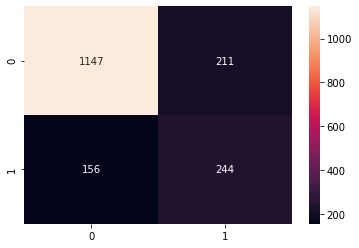

In [41]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

# Extending the notebook because of Imbalance in dataset

### How can we know that there is an imbalance let's see how

In [49]:
df_1=df_final[df.Churn=='Yes']
df_2=df_final[df.Churn=='No']

C:\Users\Jignesh\anaconda3\envs\jenil\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Jignesh\anaconda3\envs\jenil\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [50]:
df_1.shape,df_2.shape

((1869, 27), (5163, 27))

### Now as we can see here that we have abt 1870 yes and 5200 no samples hence the ratio of no is below 27% hence we need to make this dataset scalable there are various methods to do this as below:
<ul>
    <li>Generate random synthetic samples like the smaller samples by use of KMeans clustering</li>
    <li>SMOTE-Synthetic Minority Over-sampling Technique</li>
    <li>Ensemble Method i.e. make partions of the largr dataset and then train with smaller one and take majority vote</li>
    <li>Focal Loss :- this method is like it gives more weight to the minority samples and lesser to the higher ones</li>
<ul>

In [51]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1358
         1.0       0.54      0.61      0.57       400

    accuracy                           0.79      1758
   macro avg       0.71      0.73      0.72      1758
weighted avg       0.80      0.79      0.80      1758



### As from above we can see that the F1 score for the prediction of 1 is really low hence we need to increase that

In [58]:
df_under_test=df_2.sample(df_1.shape[0])
df_under_test=pd.concat([df_under_test,df_1],axis=0)

In [62]:
df_under_test.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [63]:
X=df_under_test.drop(['Churn'],axis=1)
Y=df_under_test.Churn

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y)

In [70]:
y_test.value_counts()

1    561
0    561
Name: Churn, dtype: int64

In [71]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Train on 2616 samples
Epoch 1/100
2616/2616 [==============================] - 1s 314us/sample - loss: 0.6272 - accuracy: 0.6659
Epoch 2/100
2616/2616 [==============================] - 0s 60us/sample - loss: 0.5183 - accuracy: 0.7580
Epoch 3/100
2616/2616 [==============================] - 0s 57us/sample - loss: 0.4945 - accuracy: 0.7649
Epoch 4/100
2616/2616 [==============================] - 0s 58us/sample - loss: 0.4888 - accuracy: 0.7714
Epoch 5/100
2616/2616 [==============================] - 0s 58us/sample - loss: 0.4837 - accuracy: 0.7703
Epoch 6/100
2616/2616 [==============================] - 0s 57us/sample - loss: 0.4811 - accuracy: 0.7703
Epoch 7/100
2616/2616 [==============================] - 0s 62us/sample - loss: 0.4781 - accuracy: 0.7741
Epoch 8/100
2616/2616 [==============================] - 0s 59us/sample - loss: 0.4775 - accuracy: 0.7726
Epoch 9/100
2616/2616 [==============================] - 0s 64us/sample - loss: 0.4757 - accuracy: 0.7787
Epoch 10/100
2616/2616 

Epoch 77/100
2616/2616 [==============================] - 0s 60us/sample - loss: 0.3959 - accuracy: 0.8234
Epoch 78/100
2616/2616 [==============================] - 0s 63us/sample - loss: 0.3962 - accuracy: 0.8188
Epoch 79/100
2616/2616 [==============================] - 0s 62us/sample - loss: 0.3917 - accuracy: 0.8200
Epoch 80/100
2616/2616 [==============================] - 0s 76us/sample - loss: 0.3913 - accuracy: 0.8169
Epoch 81/100
2616/2616 [==============================] - 0s 63us/sample - loss: 0.3913 - accuracy: 0.8173
Epoch 82/100
2616/2616 [==============================] - 0s 60us/sample - loss: 0.3905 - accuracy: 0.8222
Epoch 83/100
2616/2616 [==============================] - 0s 105us/sample - loss: 0.3886 - accuracy: 0.8184
Epoch 84/100
2616/2616 [==============================] - 0s 71us/sample - loss: 0.3909 - accuracy: 0.8219
Epoch 85/100
2616/2616 [==============================] - 0s 90us/sample - loss: 0.3877 - accuracy: 0.8234
Epoch 86/100
2616/2616 [============

In [75]:
y_predicted=model.predict(x_test)

In [76]:

cntr=0
for i in y_predicted:
    if i<0.5:
        y_predicted[cntr]=0
    else:
        y_predicted[cntr]=1
    cntr+=1

In [80]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       550
         1.0       0.74      0.73      0.74       572

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [82]:
model.evaluate(x_test,y_test)

1122/1122 [==============================] - 0s 159us/sample - loss: 0.5742 - accuracy: 0.7335


[0.5742192980758647, 0.73351157]